# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER'S VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

# Pre-trained Convolutional Neural Networks

Many Deep Neural Networks models have been trained in the [ImageNet dataset](http://www.image-net.org/). The training of such network architectures might take days or weeks to finish, but the weights can be shared after the training procedure.

## Inception V3 model

For example, with Keras it is possible to load the implementation of Google Inception V3 model and load the weights that have been produced after training in the ImageNet dataset.

![](./figures/inceptionv3.png)

**References**
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)
- [Google Research Blog](https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html)

Credits: François Chollet (https://github.com/fchollet/deep-learning-models)

In [1]:
%pylab inline

from keras.applications import inception_v3
from keras.preprocessing import image

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
img_path = 'figures/kitten.png'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x_cat = inception_v3.preprocess_input(x)

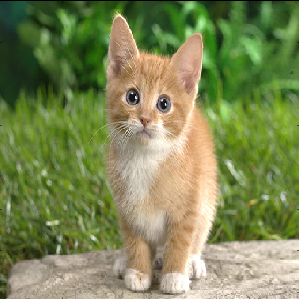

In [3]:
img

In [4]:
model = inception_v3.InceptionV3(include_top=True, weights='imagenet')

In [5]:
# model.summary()

In [6]:
preds = model.predict(x_cat)
print('Predicted:', inception_v3.decode_predictions(preds))

Predicted: [[('n02123159', 'tiger_cat', 0.4622012), ('n02124075', 'Egyptian_cat', 0.1321687), ('n02113023', 'Pembroke', 0.06409031), ('n02123045', 'tabby', 0.050259486), ('n02119789', 'kit_fox', 0.013312003)]]


# Transfer Learning

Many Deep Neural Networks models have been trained in very large datasets (e.g. [ImageNet](http://www.image-net.org/), which contains 1.2 million images with 1000 categories). The training of such network architectures might take days or weeks to finish, but the weights can be shared after the training procedure.

In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset, and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest. The two major Transfer Learning scenarios look as follows:

- ConvNet as fixed feature extractor. Take a ConvNet pretrained on ImageNet, remove the last fully-connected layer (this layer’s outputs are the 1000 class scores for a different task like ImageNet), then treat the rest of the ConvNet as a fixed feature extractor for the new dataset. In an AlexNet, this would compute a 4096-D vector for every image that contains the activations of the hidden layer immediately before the classifier. We call these features CNN codes. It is important for performance that these codes are ReLUd (i.e. thresholded at zero) if they were also thresholded during the training of the ConvNet on ImageNet (as is usually the case). Once you extract the 4096-D codes for all images, train a linear classifier (e.g. Linear SVM or Softmax classifier) for the new dataset.
- Fine-tuning the ConvNet. The second strategy is to not only replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the backpropagation. It is possible to fine-tune all the layers of the ConvNet, or it’s possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portion of the network. This is motivated by the observation that the earlier features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks, but later layers of the ConvNet becomes progressively more specific to the details of the classes contained in the original dataset. In case of ImageNet for example, which contains many dog breeds, a significant portion of the representational power of the ConvNet may be devoted to features that are specific to differentiating between dog breeds.

# Scraping

In [7]:
import os
import keras
from keras.preprocessing import image

In [8]:
!pip install google_images_download

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


This script downloads a set of images from Google Images given a set of keywords. Very useful for training image classification algorithms.  
(Author: Hardik Vasa, https://github.com/hardikvasa/google-images-download)

In [9]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()    

In [10]:
def scrape(keyword, max_num):
    response.download({"keywords": keyword, "limit":max_num, "format":"jpg", "output_directory":"./google_images"})

scrape('rubik', 10)


Item no.: 1 --> Item name = rubik
Evaluating...
Starting Download...
Completed Image ====> 1. rsc__large.jpg
Completed Image ====> 2. rubik_s_cube_19093_4_.jpg
Completed Image ====> 3. rubik-cube-7x7x7-puzzle-educational-toy-500x500.jpg
Completed Image ====> 4. 81de19uniol._sl1500_.jpg
Completed Image ====> 5. rub_-_30_1__enlarged.jpg
Completed Image ====> 6. 2x2x2-variations-shape-mods.jpg
Completed Image ====> 7. rubiks-cube-puzzle-patterns.jpg
Completed Image ====> 8. elite-rubiks-cube-storage-tin-unsolved.jpg
Completed Image ====> 9. rubik-cube.jpg
Completed Image ====> 10. solution-stage-one-3.jpg

Errors: 0



In [11]:
scrape('iron man', 10)


Item no.: 1 --> Item name = iron man
Evaluating...
Starting Download...
Completed Image ====> 1. 91qvandevyl._ri_.jpg
Completed Image ====> 2. 250px-iron_man_bleeding_edge.jpg
Completed Image ====> 3. marvel-iron-man-2-iron-man-mark-4-sixth-scale-figure-hot-toys-903340-08.jpg
Completed Image ====> 4. marvel-iron-man-extremis-mark-2-statue-sideshow-feature-2004151.jpg
Completed Image ====> 5. 4314.jpg
Completed Image ====> 6. marvel-iron-man-avengers-assemble-statue-sideshow-200354-11.jpg
Completed Image ====> 7. 61wibphkkll._sy550_.jpg
Completed Image ====> 8. marvel-iron-man-mark-43-life-size-figure-sideshow-400312-16.jpg
Completed Image ====> 9. mv5bmtcznti2oduwof5bml5banbnxkftztcwmtu0ntizmw@@._v1_.jpg
Completed Image ====> 10. latest?cb=20170122060858.jpg

Errors: 0



In [12]:
# cleanup from bad images
import glob
from keras.preprocessing import image

for img_path in glob.glob('./google_images/**/*'):
    try:
        img = image.load_img(img_path, target_size=(299, 299))
    except OSError:
        print("Error loading image ", img_path)
        !rm "$img_path"

In [13]:
def loader(classname):
    folder = './google_images/'+classname
    fnames = [folder+'/'+x for x in os.listdir(folder)]
    collected = []
    for f in fnames:
        img = image.load_img(f, target_size=(299, 299))
        x = image.img_to_array(img)
        x = keras.applications.inception_v3.preprocess_input(x)
        collected.append(x)
    return np.array(collected)

In [14]:
rubik_pics = loader('rubik')
print(rubik_pics.shape)

(10, 299, 299, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


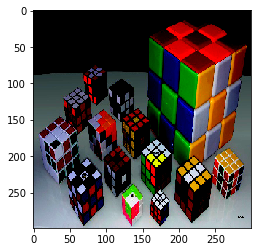

In [15]:
plt.imshow(rubik_pics[0])

In [16]:
print('Predicted:', inception_v3.decode_predictions(model.predict(np.array([rubik_pics[0]]))))

Predicted: [[('n04131690', 'saltshaker', 0.16459799), ('n03255030', 'dumbbell', 0.13343872), ('n04522168', 'vase', 0.1238114), ('n03929660', 'pick', 0.035116427), ('n03598930', 'jigsaw_puzzle', 0.031001622)]]


# Training a custom TL-based Binary Classifier

In [19]:
import keras
model = inception_v3.InceptionV3(include_top=False, weights='imagenet')

In [20]:
img_path = 'figures/kitten.png'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x_cat = inception_v3.preprocess_input(x)

In [21]:
feature_mappings = model.predict(x_cat)
print(feature_mappings.shape)

(1, 8, 8, 2048)


In [22]:
model.layers[-5:]

Freeze the layers which you don't want to train. Here we are freezing all layers.

In [23]:
for layer in model.layers:
    layer.trainable = False

Add the Dense layers to the top of the network

In [24]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model

In [25]:
#Adding custom Layers 
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs=model.input, outputs=predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

Image generator that uses data augmentation with the downloaded images.

In [26]:
!rm -r google_images/.ipynb_checkpoints
!ls -a google_images

.  ..  iron man  rubik


In [27]:
from keras.preprocessing.image import ImageDataGenerator

# Initiate the train and test generators with data Augumentation 
data_gen_args = dict(
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30,
    preprocessing_function=inception_v3.preprocess_input
)

train_datagen = ImageDataGenerator(**data_gen_args)
test_datagen  = ImageDataGenerator(**data_gen_args)

(img_height, img_width) = (299, 299)
batch_size = 8
train_data_dir = './google_images'
validation_data_dir = './google_images'

nb_train_samples = 100
nb_validation_samples = 10
epochs = 10

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical",
seed=42)

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical",
seed=42)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [28]:
model_final.fit_generator(
train_generator,
steps_per_epoch = nb_train_samples/batch_size,
epochs = 5,
validation_data = validation_generator,
validation_steps = 2
)

Epoch 1/5
13/12 [===============================] - 12s 942ms/step - loss: 0.6006 - acc: 0.6531 - val_loss: 0.2177 - val_acc: 0.9375
Epoch 2/5
13/12 [===============================] - 6s 447ms/step - loss: 0.4712 - acc: 0.7508 - val_loss: 0.0471 - val_acc: 1.0000
Epoch 3/5
13/12 [===============================] - 6s 452ms/step - loss: 0.4726 - acc: 0.8003 - val_loss: 0.0345 - val_acc: 1.0000
Epoch 4/5
13/12 [===============================] - 6s 432ms/step - loss: 0.4278 - acc: 0.8185 - val_loss: 0.2167 - val_acc: 0.9375
Epoch 5/5
13/12 [===============================] - 5s 418ms/step - loss: 0.1524 - acc: 0.9416 - val_loss: 0.0757 - val_acc: 0.9375


Save the model to disk

In [29]:
import datetime
now = datetime.datetime.now().strftime('%Y%m%d%H%M%S')

model_file_name = "model_final_%s.json"%now
weghts_file_name = "model_final_%s.h5"%now

# serialize model to JSON
model_json = model.to_json()
with open(model_file_name, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(weghts_file_name)

print("Saved model to disk. Model was saved in %s. Weights were saved in %s." % (model_file_name, weghts_file_name))

Saved model to disk. Model was saved in model_final_20181003001646.json. Weights were saved in model_final_20181003001646.h5.


In [30]:
import glob
from IPython.display import display

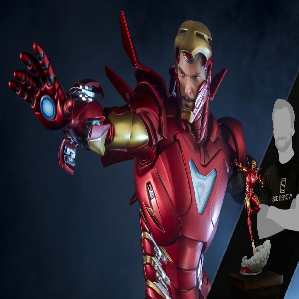

[('iron man', 0.9941849), ('rubik', 0.0058151446)] 




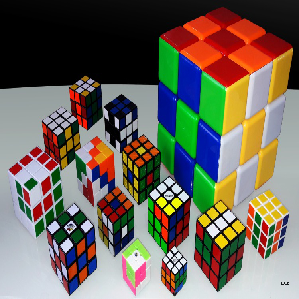

[('iron man', 0.005426619), ('rubik', 0.9945734)] 




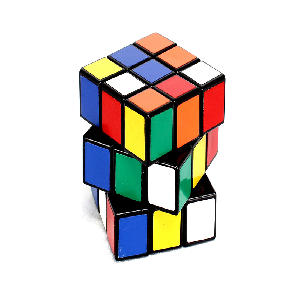

[('iron man', 0.0003003637), ('rubik', 0.9996997)] 




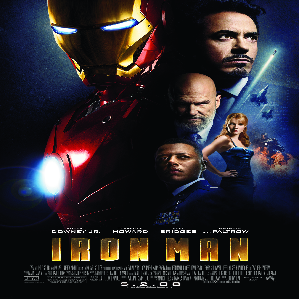

[('iron man', 0.9885123), ('rubik', 0.0114877)] 




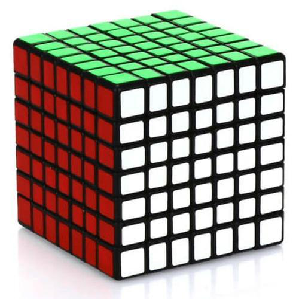

[('iron man', 0.0038060902), ('rubik', 0.9961939)] 




In [31]:
image_paths = glob.glob(train_data_dir + '/**/*.jpg')
shuffle(image_paths)
my_labels = os.listdir('./'+train_data_dir)


for img_path in image_paths[:5]:
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = inception_v3.preprocess_input(x)
    pred = model_final.predict(x)
    
    display(img)
    print(list(zip(my_labels,pred[0])),'\n\n')

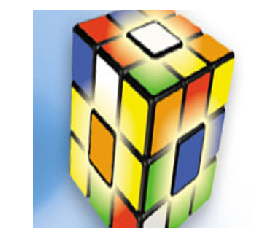

[('iron man', 7.033417e-05), ('rubik', 0.99992967)] 




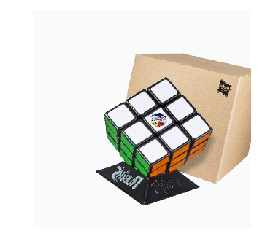

[('iron man', 0.00018668748), ('rubik', 0.9998134)] 




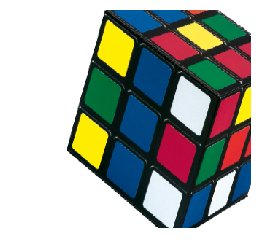

[('iron man', 0.00047624114), ('rubik', 0.99952376)] 




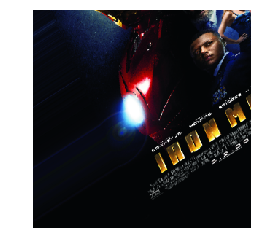

[('iron man', 0.72396994), ('rubik', 0.27603003)] 




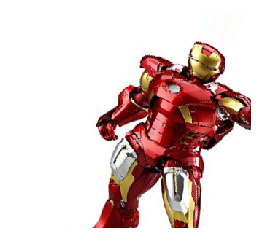

[('iron man', 0.99151224), ('rubik', 0.008487706)] 




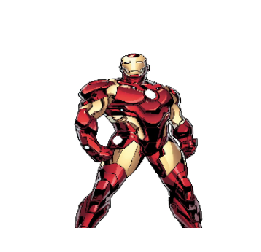

[('iron man', 0.90803725), ('rubik', 0.09196272)] 




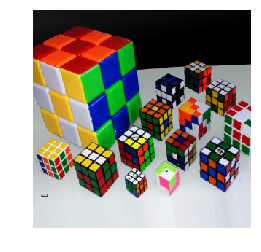

[('iron man', 0.0154569475), ('rubik', 0.984543)] 




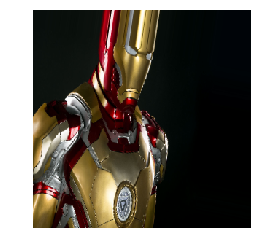

[('iron man', 0.9965777), ('rubik', 0.003422348)] 




In [33]:
batch = next(validation_generator)[0]

for i in range(len(batch)):
    x = batch[[i]]
    x -= x.min()
    x /= x.max()
    pred = model_final.predict(x)
    
    fig = plt.figure()
    plt.imshow(x[0])
    plt.axis('off')
    display(fig)
    plt.close()
    print(list(zip(my_labels,pred[0])),'\n\n')